## Import Libraries and Data

In [9]:
import polars as pl
import pandas as pd
from collections import Counter
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%run utils.ipynb

## Common Methods

In [10]:
def extract_only_attack_dfs(dfs,existing_column_name):
    return [ df[df[existing_column_name]==1]  for df in dfs]


In [11]:
def extract_non_attack_dfs(dfs,existing_column_name):
    return [ df[df[existing_column_name]==0]  for df in dfs]


In [12]:
def convert_string_datetime_to_datetime(df,existing_datetime_column_name):
    df[existing_datetime_column_name]=pd.to_datetime(df[existing_datetime_column_name])
    return df

In [13]:
def convert_multiple_dfs_datetime(dfs,existing_column_name):
    return [convert_string_datetime_to_datetime(df,existing_column_name)  for df in dfs]


In [61]:
dos_df_pd,fuzzy_df_pd,attack_free_df=load_datasets_using_pd()

In [62]:
existing_column_name="updatedFlag"
dos_df,fuzzy_df=extract_only_attack_dfs([dos_df_pd,fuzzy_df_pd],existing_column_name)
attack_free_in_dos,attack_free_in_fuzzy=extract_non_attack_dfs([dos_df_pd,fuzzy_df_pd],existing_column_name)


In [63]:
all_attack_free_df=pd.concat([attack_free_df,attack_free_in_dos,attack_free_in_fuzzy])

In [65]:
dos_df["attackType"]=1
fuzzy_df["attackType"]=2
attack_free_df["attackType"]=0
all_attack_free_df["attackType"]=0

C:\Users\Naz\AppData\Local\Temp\ipykernel_15308\2910093653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dos_df["attackType"]=1
C:\Users\Naz\AppData\Local\Temp\ipykernel_15308\2910093653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuzzy_df["attackType"]=2


In [67]:
existing_column_name="datetime"
dos_df,fuzzy_df,attack_free_df=convert_multiple_dfs_datetime([dos_df,fuzzy_df,attack_free_df],existing_column_name)
all_attack_free_df=convert_string_datetime_to_datetime(all_attack_free_df,existing_column_name)

C:\Users\Naz\AppData\Local\Temp\ipykernel_15308\1874978350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[existing_datetime_column_name]=pd.to_datetime(df[existing_datetime_column_name])
C:\Users\Naz\AppData\Local\Temp\ipykernel_15308\1874978350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[existing_datetime_column_name]=pd.to_datetime(df[existing_datetime_column_name])


## Plotting Common Methods

In [68]:
def plot_bar_plot(df, column_names):
    if len(column_names) != 2:
        raise ValueError("`column_names` must contain exactly two elements: [x_column, y_column].")
    
    plt.figure(figsize=(12, 6)) 
    
    sns.barplot(x=column_names[0], y=column_names[1], data=df, palette="viridis")

    plt.xlabel(column_names[0], fontsize=14)
    plt.ylabel(column_names[1], fontsize=14)
    plt.title(f"{column_names[0]}-{column_names[1]}", fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.show()


In [71]:
def plot_count_chart(df,column_name):
    plt.figure(figsize=(10,8))
    
    sns.countplot(x=column_name, data=df, palette='viridis')
    
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [70]:
def plot_bar_chart_of_percentages(df,column_name):
    counts = Counter(df[column_name])
    categories = list(counts.keys())
    values = list(counts.values())
    
    total = sum(values)
    percentages = [value / total * 100 for value in values]
    
    plt.bar(categories, values)
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.title('Bar Chart with Percentages')

    for i, (value, pct) in enumerate(zip(values, percentages)):
        plt.text(i, value, f'{pct:.1f}%', ha='center', fontsize=15)

    plt.show()

In [72]:
def plot_pie_chart(df, column_name):
    data = Counter(df[column_name])
    key_list = list(data.keys())
    val_list = list(data.values())

    fig1, ax1 = plt.subplots()
    wedges, texts, autotexts = ax1.pie(val_list, autopct='%1.1f%%',
                                       shadow=True, startangle=90)
    ax1.legend(wedges, key_list, title="Categories", loc="center left",
               bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

In [73]:
def plot_hist(df, column_name,bin_number):
    plt.figure(figsize=(8, 6))
    
    plt.hist(df[column_name], bins=bin_number, edgecolor="black", alpha=0.7)

    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {column_name}")
    plt.show()

In [74]:
def plot_line_graph(df,x,y):
    
    sns.set_theme(style="whitegrid") 

    plt.figure(figsize=(10, 4)) 
    sns.lineplot(data=df, x=x, y=y)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{x}--{y}")

    plt.show()


In [75]:
def plot_line_graph(df,x,y,figsize=(12,7)):
    
    sns.set_theme(style="whitegrid") 
    plt.figure(figsize=figsize)

    sns.lineplot(data=df, x=x, y=y)
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{x}--{y}")

    plt.show()

In [76]:
def plot_scatter_graph_grid(df, x, byte_columns, figsize=(24, 8)):
    sns.set_theme(style="whitegrid")
    
    # Create a 2x4 grid of subplots
    fig, axes = plt.subplots(2, 4, figsize=figsize)
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

    for i, byte_col in enumerate(byte_columns):
        sns.scatterplot(data=df, x=x, y=byte_col, ax=axes[i])
        axes[i].set_title(f"{x} vs {byte_col}")
        axes[i].set_xlabel(x)
        axes[i].set_ylabel(byte_col)
    
    # Hide any unused subplots (if fewer than 8 columns)
    for j in range(len(byte_columns), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()


## Univariate Analysis

#### Quick Analysis

In [77]:
byte_columns = [f"updatedByte{i}" for i in range(8)]


In [78]:
print(dos_df.shape)
print(fuzzy_df.shape)
print(attack_free_df.shape)
print(all_attack_free_df.shape)

(587521, 13)
(491847, 13)
(988871, 13)
(7414132, 13)


In [30]:
# dos_df.head()

In [31]:
# fuzzy_df.head()

In [32]:
# attack_free_df.head()

#### updatedCanId

In [33]:
# plot_count_chart(dos_df,"updatedCanId")

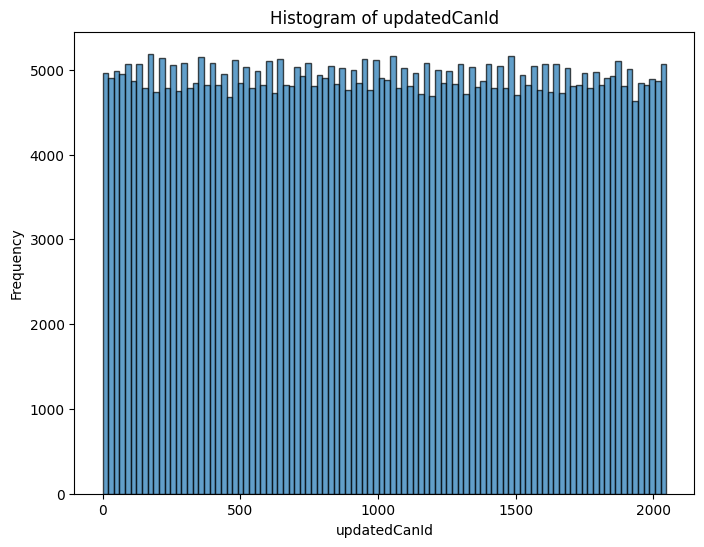

In [34]:
plot_hist(fuzzy_df, "updatedCanId",100)

In [79]:
all_attack_free_df["updatedCanId"].nunique()


38

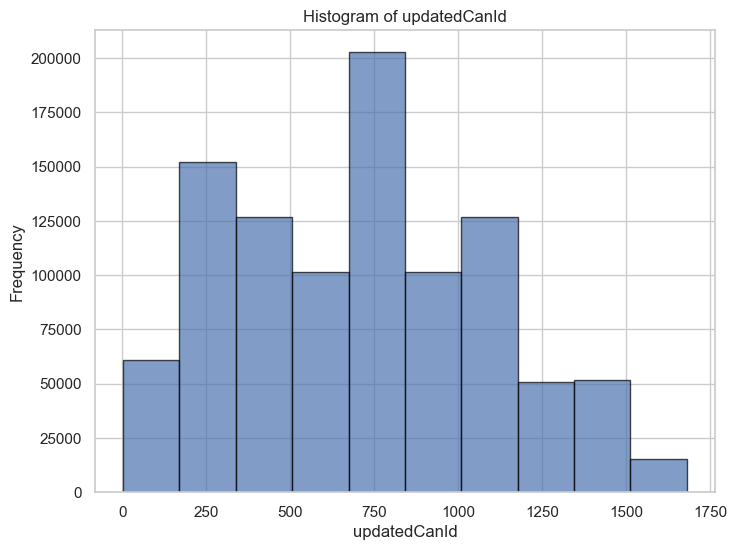

In [80]:
plot_hist(attack_free_df, "updatedCanId",10)

#### dlc

In [37]:
# plot_pie_chart(dos_df,"dlc")

In [38]:
# plot_pie_chart(fuzzy_df,"dlc")

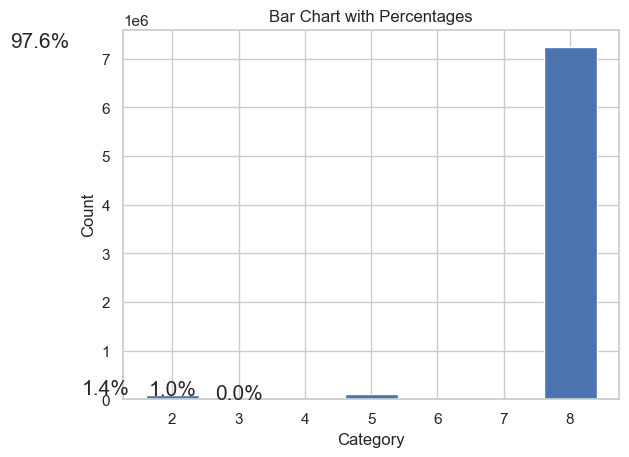

In [81]:
plot_bar_chart_of_percentages(all_attack_free_df,"dlc")

In [82]:
all_attack_free_df["dlc"].value_counts()

dlc
8    7234373
5     104057
2      75699
6          3
Name: count, dtype: int64

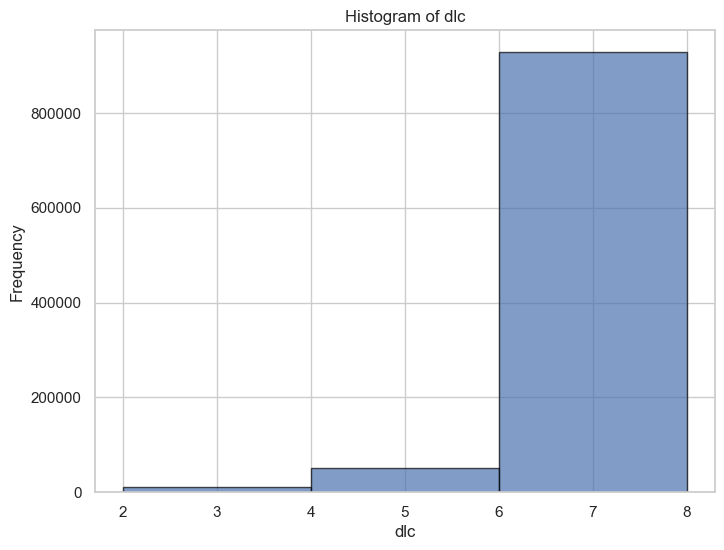

In [83]:
plot_hist(attack_free_df, "dlc",3)

#### updatedBytes

In [43]:
# [dos_df[f"updatedByte{i}"].unique() for i in range(8)]

In [44]:
# [fuzzy_df[f"updatedByte{i}"].nunique() for i in range(8)]

In [45]:
# fuzzy_df[[f"updatedByte{i}" for i in range(8)]].corr()

In [84]:
[all_attack_free_df[f"updatedByte{i}"].nunique() for i in range(8)]

[256, 256, 256, 256, 256, 256, 228, 256]

In [85]:
all_attack_free_df[[f"updatedByte{i}" for i in range(8)]].corr()

,updatedByte0,updatedByte1,updatedByte2,updatedByte3,updatedByte4,updatedByte5,updatedByte6,updatedByte7
updatedByte0,1.000000,0.219643,-0.168148,-0.189503,0.250136,0.086862,-0.140091,-0.221808
updatedByte1,0.219643,1.000000,0.179220,0.154030,-0.028530,0.171493,-0.253561,0.121092
updatedByte2,-0.168148,0.179220,1.000000,0.080260,0.261321,-0.136374,0.270401,0.083953
updatedByte3,-0.189503,0.154030,0.080260,1.000000,0.067028,0.564374,-0.042694,-0.042733
updatedByte4,0.250136,-0.028530,0.261321,0.067028,1.000000,0.315744,0.146553,-0.013186
updatedByte5,0.086862,0.171493,-0.136374,0.564374,0.315744,1.000000,0.003467,-0.127207
updatedByte6,-0.140091,-0.253561,0.270401,-0.042694,0.146553,0.003467,1.000000,-0.132757
updatedByte7,-0.221808,0.121092,0.083953,-0.042733,-0.013186,-0.127207,-0.132757,1.000000


#### updatedFlag

In [48]:
# plot_pie_chart(dos_df,"updatedFlag")

In [49]:
# plot_pie_chart(fuzzy_df,"updatedFlag")

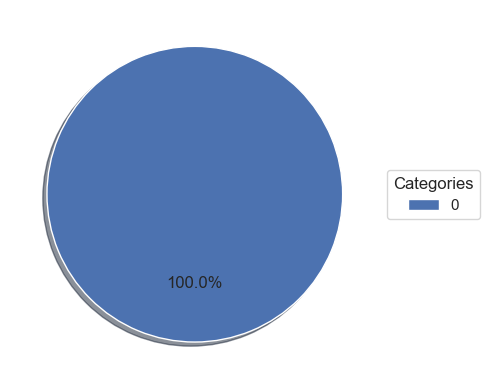

In [86]:
plot_pie_chart(all_attack_free_df,"updatedFlag")

### Insights about Univariate Analysis


**All-Attack-Free Dataset** means concatenated dfs such as attack free in dos and fuzzy and also attack free dataset.

#### **Shape**
- **DOS Dataset:** Shape is `(587,521, 13)`  
- **Fuzzy Dataset:** Shape is `(491,847, 13)`  
- **All-Attack-Free Dataset:** Shape is `(7,414,132, 13)`  

#### **Updated CAN ID**
- **DOS Dataset:** Contains only a single value: `0`.  
- **Fuzzy Dataset:** 
  - Contains **2,048 unique IDs** ranging between `0` and `2,047`.  
  - Observing the top 100 most used IDs reveals a **uniform distribution**.  
- **All-Attack-Free Dataset:** 
  - Contains **38 unique IDs** with a **non-normal distribution**.  

#### **DLC (Data Length Code)**
- **DOS Dataset:** Limited to **8 as unique value**.  
- **Fuzzy Dataset:** Limited to **8 as unique value**.  
- **All-Attack-Free Dataset:** Includes values such as **2, 5, 6, and 8**, but values other than `8` are **extremely rare**. These may be removed during data cleaning for simplification.  
#### **UpdatedByte0 to UpdatedByte7**
- **DOS Dataset:** Contains only a single value: `0`.    
- **Fuzzy Dataset:** Contains 256 unique values in each byte column. Correlation between byte columns does not represent meaningfull information, instead show some little noise. 
- **All-Attack-Free Dataset:** Contains 256 unique values in each byte column. Strong correlations occur rather than fuzzy dataset. Columns like updatedByte0, updatedByte4, and updatedByte2 show moderate positive correlations with one another


#### **Updated Flag**
- **DOS Dataset:** All values are labeled as `injected`.  
- **Fuzzy Dataset:** All values are labeled as `injected`.  
- **All-Attack-Free Dataset:** All values are labeled as `normal`.  


## Bivariate Analysis

In [51]:
dos_df_resampled = dos_df.resample('min',on='datetime').mean()
fuzzy_df_resampled = fuzzy_df.resample('min',on='datetime').agg(lambda x: x.mode()[0])
attack_free_df_resampled = attack_free_df.resample('min',on='datetime').agg(lambda x: x.mode()[0])

####  Datetime-UpdatedCanId

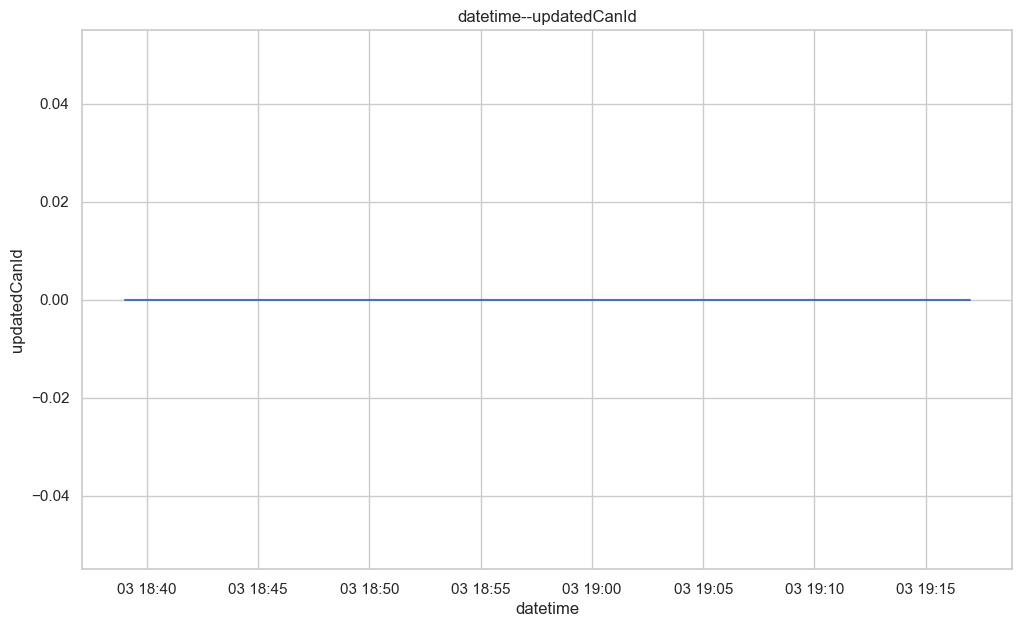

In [52]:
plot_line_graph(dos_df_resampled,"datetime","updatedCanId")

- there is only 0 value while dos attack happens

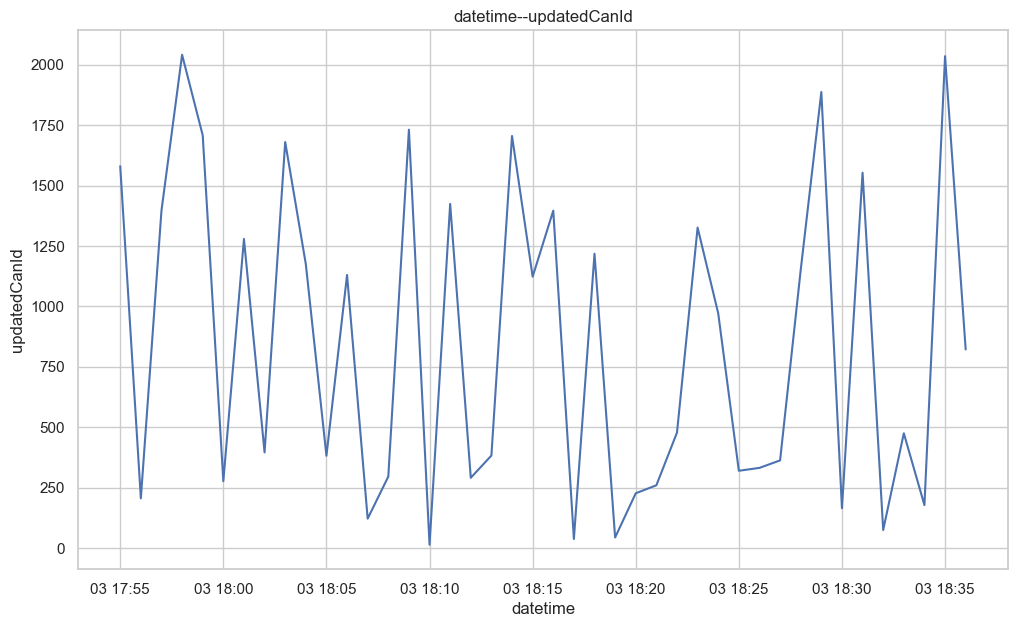

In [53]:
plot_line_graph(fuzzy_df_resampled,"datetime","updatedCanId")

- can id values are random

In [54]:
# plot_line_graph(attack_free_df_resampled,"datetime","updatedCanId")

In [55]:
dos_df.dtypes

updatedCanId             int64
datetime        datetime64[ns]
dlc                      int64
updatedByte0             int64
updatedByte1             int64
updatedByte2           float64
updatedByte3           float64
updatedByte4           float64
updatedByte5           float64
updatedByte6           float64
updatedByte7           float64
updatedFlag              int64
attackType               int64
dtype: object

In [56]:
dos_df.columns

Index(['updatedCanId', 'datetime', 'dlc', 'updatedByte0', 'updatedByte1',
       'updatedByte2', 'updatedByte3', 'updatedByte4', 'updatedByte5',
       'updatedByte6', 'updatedByte7', 'updatedFlag', 'attackType'],
      dtype='object')

#### Datetime-DLC

In [57]:
# plot_line_graph(dos_df_resampled,"datetime","dlc")

In [58]:
# plot_line_graph(fuzzy_df_resampled,"datetime","dlc")

In [59]:
# plot_line_graph(attack_free_df_resampled,"datetime","dlc")

- dos and fuzzy have only 8 as dlc value, whereas attack-free has some other values but neverthless 8 is most used.

#### Datetime-UpdatedBytes

In [60]:
plot_line_graph_grid(fuzzy_df_resampled, "datetime", byte_columns)

NameError: name 'plot_line_graph_grid' is not defined

In [ ]:
plot_line_graph_grid(dos_df_resampled, "datetime", byte_columns)


In [64]:
# plot_line_graph_grid(attack_free_df, "datetime", byte_columns)
